switch to your branch: git checkout <branch name>

after making changes to branch: git add, git commit, git push
    
make a pull request on github and approve by all members

update your branch when everyone makes changes and pull requests: git pull and then git merge main then git push
    need to do this so that you can merge changes that others made onto your branch
    

https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

           neighborhood  number of speedhumps
0   Squirrel Hill South                    18
1               Carrick                     9
2           Polish Hill                     6
3         North Oakland                     6
4            Upper Hill                     4
5             Brookline                     4
6        Homewood South                     4
7     South Side Slopes                     4
8           Perry North                     4
9              Garfield                     3
10  Squirrel Hill North                     3
11     South Side Flats                     3
12     Mount Washington                     3
13           Bloomfield                     3
14        Highland Park                     2
15      Central Oakland                     1
16      Stanton Heights                     1
17            Overbrook                     1


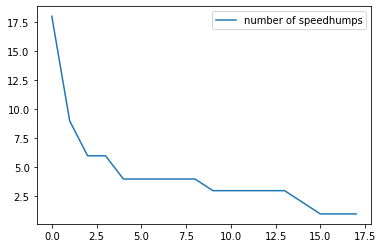

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file into fire dataframe
speedbumps_raw = pd.read_csv("speedbumps.csv", sep=",")
headcounts_raw = pd.read_csv("headcount.csv", sep = ",")

# was getting an error because there are missing neighborhoods in some rows. clean data by removing those
#fire = fire_raw.dropna(subset=['neighborhood'])

speedbumps = speedbumps_raw[['neighborhood']].copy()

# Count how many times each neighborhood shows up
speed_df = speedbumps['neighborhood'].value_counts()
speed_df = speed_df.reset_index()
speed_df.columns = ['neighborhood', 'number of speedhumps']

#create dataframe headcounts and rename cols to match up with naming convention
headcount_df = headcounts_raw[["Neighborhood", "2020_Total_Population"]]

headcount_df = headcount_df.rename(columns={'Neighborhood': 'neighborhood'})

print(speed_df)
speed_df.plot()


           neighborhood  percent speedbumps per capita
2           Polish Hill                       0.499584
4            Upper Hill                       0.232153
6        Homewood South                       0.176991
0   Squirrel Hill South                       0.117516
8           Perry North                       0.106440
7     South Side Slopes                       0.092443
1               Carrick                       0.087464
9              Garfield                       0.082350
3         North Oakland                       0.056122
11     South Side Flats                       0.040177
13           Bloomfield                       0.034622
12     Mount Washington                       0.034443
14        Highland Park                       0.032077
5             Brookline                       0.030621
17            Overbrook                       0.028711
10  Squirrel Hill North                       0.025255
16      Stanton Heights                       0.022589
15      Ce

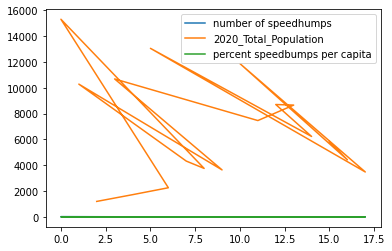

In [3]:
#merge with headcounts 
total_df = pd.merge(speed_df, headcount_df, on='neighborhood', how = 'left')


#number of speed bumps divided by population in each area
#divide 2020_total_population / number of speedbumps
total_df['percent speedbumps per capita'] =  (total_df['number of speedhumps'] / total_df['2020_Total_Population'])*100

#descending order of speedbumps_per_capita
total_df = total_df.sort_values(by='percent speedbumps per capita', ascending=False)

#print out neighborhoods and their speedbumps_per_capita
print(total_df[['neighborhood', 'percent speedbumps per capita']])

#make a graph of neighborhoods vs speedbumps per capita
total_df.plot()

We defined the best neighborhood to be the safest neighborhood. Since a large part of safety is traffic and car safety, I chose to focus my data on number of speed humps per neighborhood. The thought behind this was that the more speed humps there are in a neighborhood, the more the residents and municipality of that area care about keeping the people in that area safe and therefore the safer the neighborhood would be. From the data, Squirrel Hill originally had the most speedbumps. However, there are different concentrations of people living in each area, so I scaled it by incorporating the per capita population in this data. From here, I divided the number of speedbumps by the per capita population in each area and found that, in fact, Polish Hill was the area will the highest number of per capita speed bumps, suggesting that this is the safest neighborhood. Personally, I find Highland Park to be the safest neighborhood. I like how it's a walking neighborhood, and also the houses are very nice there. It's also a lot more expensive and there's more greenery. Even though it's one of the lowest on the breakdown, it's one of my favorites. I would have expected that, since it's closer to the city, there would be more speed bumps than there are.